In [2]:
print("Hello Wolrd!")

Hello Wolrd!


In [3]:
import pandas as pd


In [4]:

# Load the data
df = pd.read_csv('retail_price.csv')

In [5]:
df.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

## Step 1: Data Cleaning & Preparation

In [7]:
# Convert month_year to datetime
df['date'] = pd.to_datetime(df['month_year'], format='%d-%m-%Y')


In [8]:
#Drop Redundant Columns
df.drop(['month_year', 'month', 'year'], axis=1, inplace=True)


In [9]:
# Reorder Columns
df = df.sort_values('date')
df.set_index('date', inplace=True)  # Useful for time series


In [10]:
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 676 entries, 2017-01-01 to 2018-08-01
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   qty                         676 non-null    int64  
 3   total_price                 676 non-null    float64
 4   freight_price               676 non-null    float64
 5   unit_price                  676 non-null    float64
 6   product_name_lenght         676 non-null    int64  
 7   product_description_lenght  676 non-null    int64  
 8   product_photos_qty          676 non-null    int64  
 9   product_weight_g            676 non-null    int64  
 10  product_score               676 non-null    float64
 11  customers                   676 non-null    int64  
 12  weekday                     676 non-null    int64  
 13  weekend         

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 676 entries, 2017-01-01 to 2018-08-01
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   qty                         676 non-null    int64  
 3   total_price                 676 non-null    float64
 4   freight_price               676 non-null    float64
 5   unit_price                  676 non-null    float64
 6   product_name_lenght         676 non-null    int64  
 7   product_description_lenght  676 non-null    int64  
 8   product_photos_qty          676 non-null    int64  
 9   product_weight_g            676 non-null    int64  
 10  product_score               676 non-null    float64
 11  customers                   676 non-null    int64  
 12  weekday                     676 non-null    int64  
 13  weekend         

## Step 2: Exploratory Data Analysis (EDA)

In [12]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
qty,676.0,14.495562,15.443421,1.000000,4.000000,10.000000,18.000000,122.00
total_price,676.0,1422.708728,1700.123100,19.900000,333.700000,807.890000,1887.322500,12095.00
freight_price,676.0,20.682270,10.081817,0.000000,14.761912,17.518472,22.713558,79.76
unit_price,676.0,106.496800,76.182972,19.900000,53.900000,89.900000,129.990000,364.00
product_name_lenght,676.0,48.720414,9.420715,29.000000,40.000000,51.000000,57.000000,60.00
product_description_lenght,676.0,767.399408,655.205015,100.000000,339.000000,501.000000,903.000000,3006.00
product_photos_qty,676.0,1.994083,1.420473,1.000000,1.000000,1.500000,2.000000,8.00
product_weight_g,676.0,1847.498521,2274.808483,100.000000,348.000000,950.000000,1850.000000,9750.00
product_score,676.0,4.085503,0.232021,3.300000,3.900000,4.100000,4.200000,4.50
customers,676.0,81.028107,62.055560,1.000000,34.000000,62.000000,116.000000,339.00


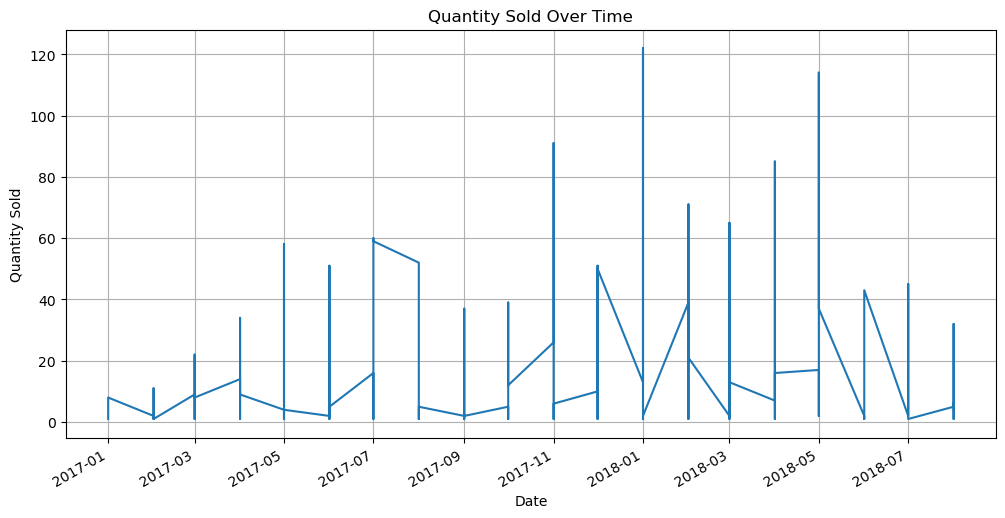

In [13]:
# Visualize Quantity Sold Over Time
#Top product categories by total quantity sold
import matplotlib.pyplot as plt

df['qty'].plot (figsize=(12,6), title='Quantity Sold Over Time')
plt.xlabel("Date")
plt.ylabel("Quantity Sold")
plt.grid(True)
plt.show()


<Axes: title={'center': 'Total Quantity Sold by Product Category'}, xlabel='product_category_name'>

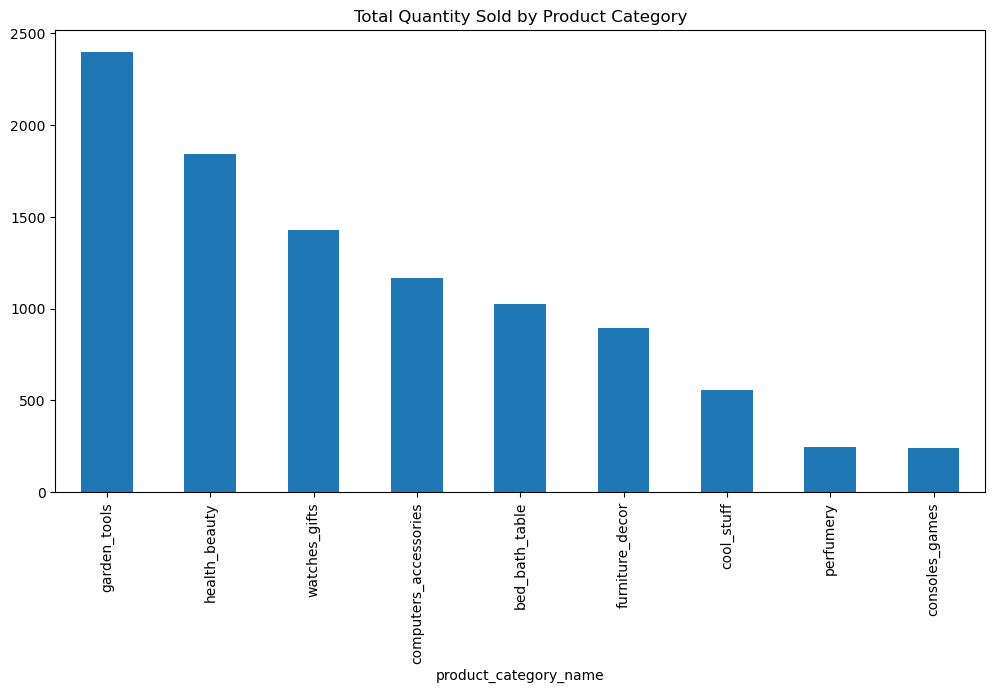

In [14]:
# Product-Level Analysis
#Top product categories by total quantity sold:
df.groupby('product_category_name')['qty'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(12,6), title='Total Quantity Sold by Product Category')


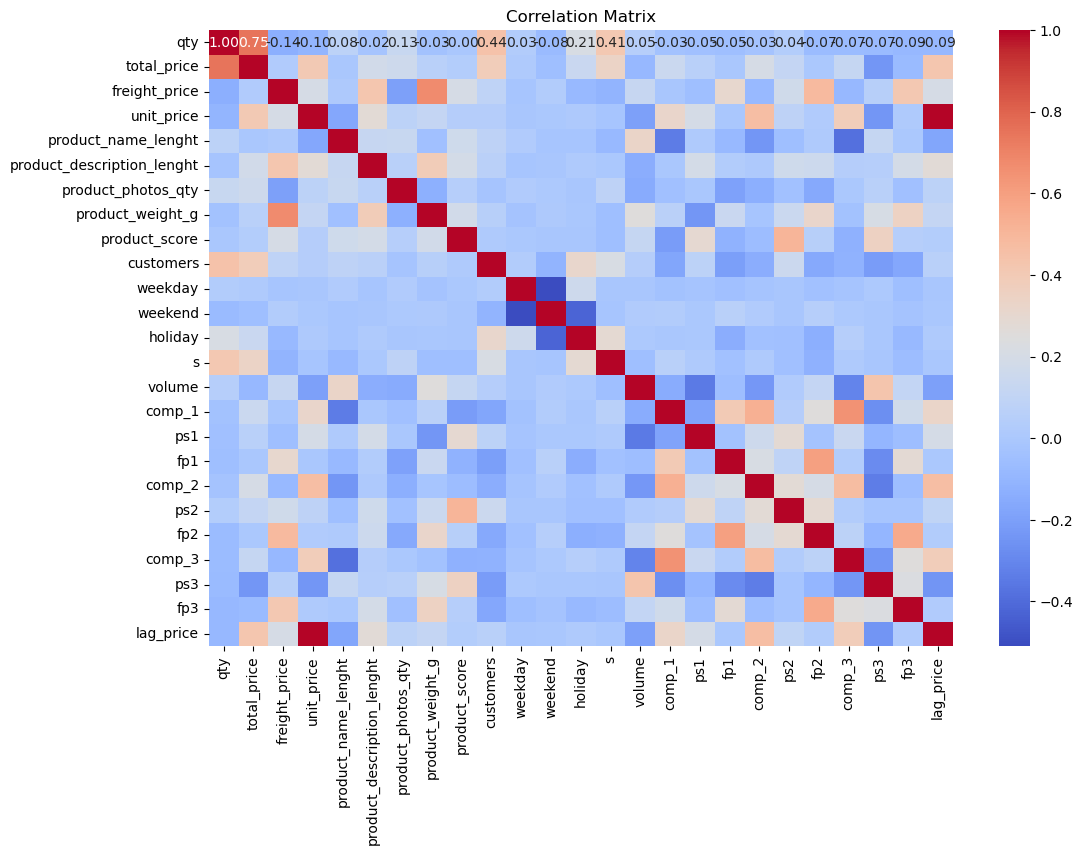

'Especially check correlations with:\nunit_price\nfreight_price\nholiday, weekend, product_score, comp_1, lag_price, etc.\n'

In [15]:
#Correlation Analysis
#See how different features relate to sales (qty).
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


"""Especially check correlations with:
unit_price
freight_price
holiday, weekend, product_score, comp_1, lag_price, etc.
"""

<Axes: title={'center': 'Average Quantity Sold by Weekday'}, xlabel='date'>

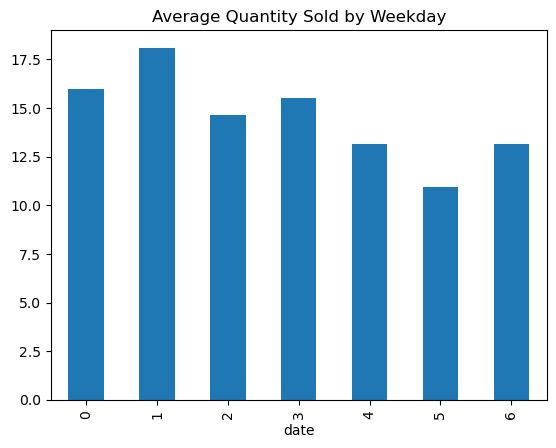

In [16]:
# Seasonality / Temporal Patterns
#Break down by month or weekday:
df.groupby(df.index.weekday)['qty'].mean().plot(kind='bar', title='Average Quantity Sold by Weekday')


<Axes: title={'center': 'Average Quantity Sold by Month'}, xlabel='date'>

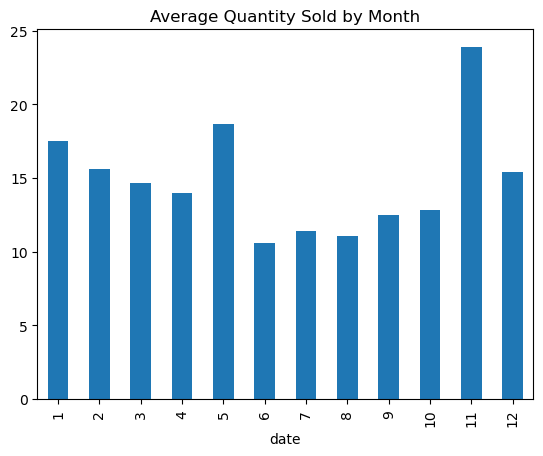

In [17]:
df.groupby(df.index.month)['qty'].mean().plot(kind='bar', title='Average Quantity Sold by Month')

## Lag & Competitor Effects Analysis 

✅ Lag Effect Analysis (Lag Price → Sales)

Goal:
To determine how previous prices (lag_price) influence current sales volume (qty).

Why it matters:

Customer memory & behavior: Shoppers may remember previous prices and delay or accelerate their purchase decisions.

Pricing strategy: If high past prices reduce current sales, you may need to optimize price timing to avoid demand drops.

Helps model delayed responses in time series.

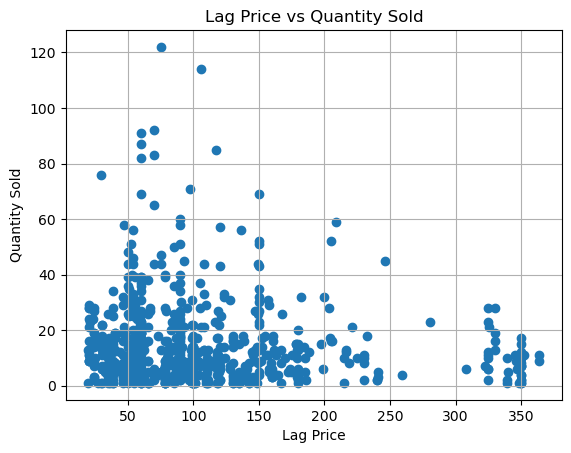

In [18]:
# Lag Effect
#Plot lag price vs current qty to see delayed price effect

plt.scatter(df['lag_price'], df['qty'])
plt.xlabel("Lag Price")
plt.ylabel("Quantity Sold")
plt.title("Lag Price vs Quantity Sold")
plt.grid(True)
plt.show()

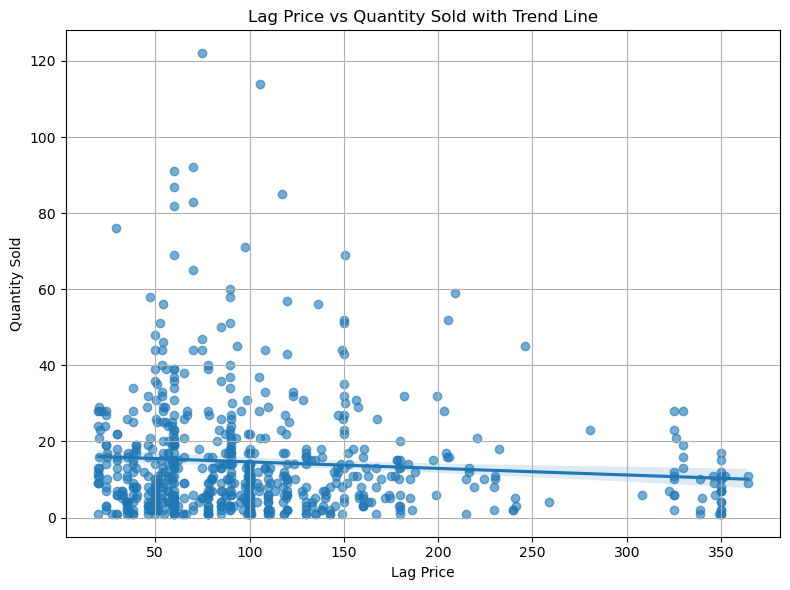

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot with trend line
plt.figure(figsize=(8, 6))
sns.regplot(x='lag_price', y='qty', data=df, scatter_kws={'alpha':0.6})
plt.xlabel("Lag Price")
plt.ylabel("Quantity Sold")
plt.title("Lag Price vs Quantity Sold with Trend Line")
plt.grid(True)
plt.tight_layout()
plt.show()


Slight Negative Trend:

The trend line slopes slightly downward, indicating a very weak negative correlation.

Interpretation: As lagged prices increase, there is a slight tendency for current quantity sold to decrease.

Your scatterplot with trend line shows that as lag_price increases, quantity tends to slightly decrease, indicating negative lag effect.



✅ 🛒 2. Competitor Effect Analysis (Competitor Prices → Your Sales)

Goal:
To understand if competitor prices (comp_1, comp_2, comp_3) are impacting your own product sales.

Why it matters:

Price competition: If your competitors lower prices, you might see a drop in your own sales.

Helps assess market sensitivity to rivals' pricing and quality (product scores).

Enables smarter competitive pricing strategy to retain or grow market share.


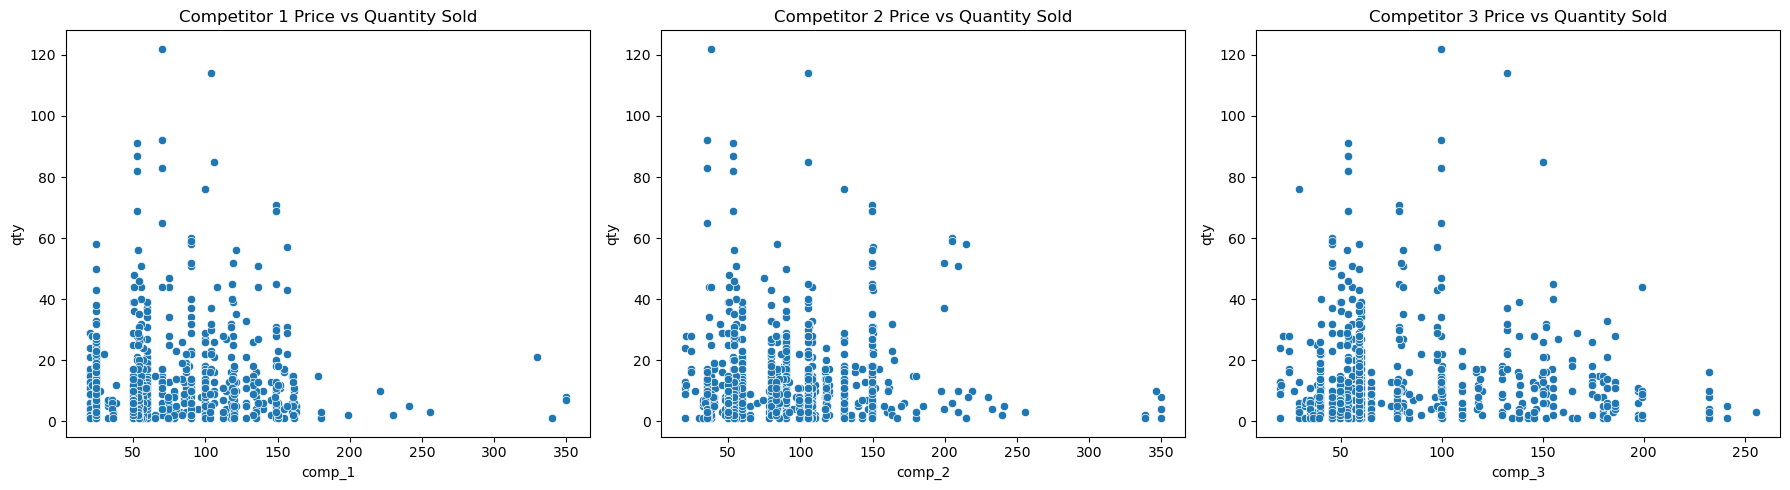

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot own price vs competitor prices
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
sns.scatterplot(x='comp_1', y='qty', data=df, ax=ax[0])
ax[0].set_title('Competitor 1 Price vs Quantity Sold')

sns.scatterplot(x='comp_2', y='qty', data=df, ax=ax[1])
ax[1].set_title('Competitor 2 Price vs Quantity Sold')

sns.scatterplot(x='comp_3', y='qty', data=df, ax=ax[2])
ax[2].set_title('Competitor 3 Price vs Quantity Sold')

plt.tight_layout()
plt.show()


🔍 Interpretation: Competitor Price vs Quantity Sold

Each subplot shows the relationship between a competitor's price and our quantity sold (qty).

📊 Left Plot: comp_1 vs qty
Observation: There is a slight downward trend — when comp_1's price increases, our sales don’t increase significantly.

Insight: Your product may not be very price-sensitive to comp_1. The relationship is weak or neutral.

📊 Middle Plot: comp_2 vs qty
Observation: A similar pattern as comp_1 — data is widely scattered, with little evidence that comp_2’s price directly impacts our sales volume.

Insight: This might mean our product is in a different market niche or comp_2 is not our direct competitor.

📊 Right Plot: comp_3 vs qty
Observation: Again, the data shows no strong inverse or positive trend.

Insight: There’s likely low cross-price elasticity between our product and comp_3’s price.



In [22]:
df[['qty', 'comp_1', 'comp_2', 'comp_3']].corr()


,qty,comp_1,comp_2,comp_3
qty,1.000000,-0.033570,-0.027044,-0.068522
comp_1,-0.033570,1.000000,0.532859,0.650433
comp_2,-0.027044,0.532859,1.000000,0.472245
comp_3,-0.068522,0.650433,0.472245,1.000000


📊 Interpretation of Correlation Matrix

| Variable Pair        | Correlation | Interpretation                                                              |
| -------------------- | ----------- | --------------------------------------------------------------------------- |
| `qty` vs `comp_1`    | -0.03       | Very weak negative — **almost no impact**                                   |
| `qty` vs `comp_2`    | -0.03       | Same — **negligible relationship**                                          |
| `qty` vs `comp_3`    | -0.07       | Still weak, slightly more negative, but **not meaningful**                  |
| `comp_1` vs `comp_2` | 0.53        | Moderate positive — **some overlap in pricing strategies**                  |
| `comp_1` vs `comp_3` | 0.65        | Stronger relationship — these two may **belong to similar segments**        |
| `comp_2` vs `comp_3` | 0.47        | Moderate correlation — again, **some connection** between these competitors |


✅ Key Takeaways

Your quantity sold (qty) is not significantly correlated with any of the competitor prices.

The competitors are moderately correlated with each other, suggesting they may adjust prices similarly (shared market forces).

These weak correlations confirm what we saw in the scatter plots — competitor pricing has limited direct impact on your sales volume.



## Step: Feature Importance Analysis

✅ Objective:

Use a model (like Random Forest) to determine which features most strongly impact sales.

1. Prepare the Data

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Define features and target
X = df.drop(columns=['qty', 'product_id', 'product_category_name'])
y = df['qty']

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


2. Train a Random Forest Regressor

In [28]:
# Step 3: Train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

3. Plot Feature Importance

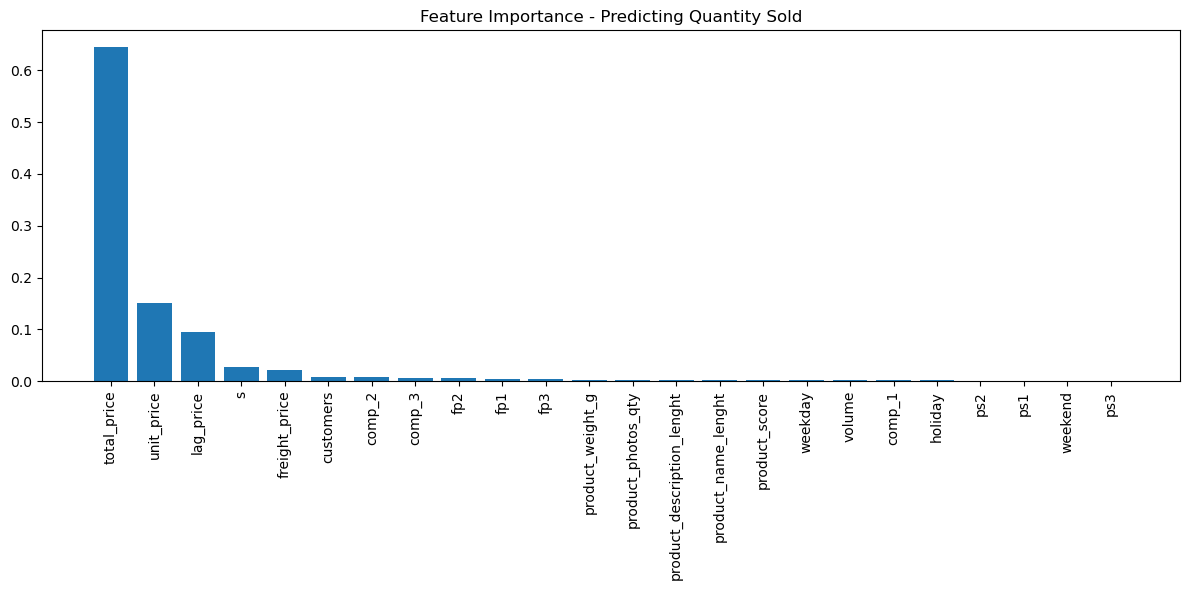

In [29]:
# Step 4: Plot feature importances
importances = rf.feature_importances_
feature_names = X.columns
indices = importances.argsort()[::-1]

# Plot
plt.figure(figsize=(12, 6))
plt.title("Feature Importance - Predicting Quantity Sold")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()


Top Features Driving Sales
| Rank | Feature         | Interpretation                                                                                                                                     |
| ---- | --------------- | -------------------------------------------------------------------------------------------------------------------------------------------------- |
| 1️⃣  | `total_price`   | Strongest predictor — higher total price often comes from bulk purchases (more quantity). This makes sense since `qty * unit_price = total_price`. |
| 2️⃣  | `unit_price`    | Price sensitivity — lower unit prices may lead to higher sales.                                                                                    |
| 3️⃣  | `lag_price`     | Price in the previous time step influences current sales — captures delayed consumer response.                                                     |
| 4️⃣  | `s`             | Possibly a derived metric (e.g., sales per customer or per day); has predictive value.                                                             |
| 5️⃣  | `freight_price` | May reflect regional or delivery differences affecting purchase decisions.                                                                         |


💡 Minor or Negligible Features

Most of the other features (competitor prices, product details, holiday, weekday, etc.) have very low importance, suggesting they contribute little to the prediction relative to price-related features.



🧠 Insights

Sales are heavily driven by pricing and direct transaction attributes.

Competitor prices have minimal influence — perhaps customers are not very price-comparative.

Product features (weight, photos, etc.) have negligible effect, indicating they don’t vary much or don’t matter in this product category.

Temporal/holiday effects seem minimal — might be due to uniform demand or low sensitivity.

